Input Image:

In [32]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

input_image = Image.open("../input_images/lena512.bmp")
image_array = np.array(input_image)
height, width = image_array.shape

print(image_array)
print(f"Shape: {image_array.shape}")  #(height, width)

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]
Shape: (512, 512)


In [33]:
def show_results(output_array,output_image_name,input_image_array=input_image):
    Image.fromarray(output_array.astype(np.uint8)).save("../output_images/"+output_image_name+"_image.bmp")
    plt.figure(figsize=(10, 5))
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(np.array(input_image_array), cmap="gray")
    plt.title("Original Image", fontsize=16)
    plt.axis("off")
    # output Image
    plt.subplot(1, 2, 2)
    plt.imshow(output_array, cmap="gray")
    plt.title(output_image_name+" Image", fontsize=16)
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("../output_images/"+output_image_name+"_result.png", dpi=300, bbox_inches='tight')
    plt.show()

Simple Halftoning Algorithm:

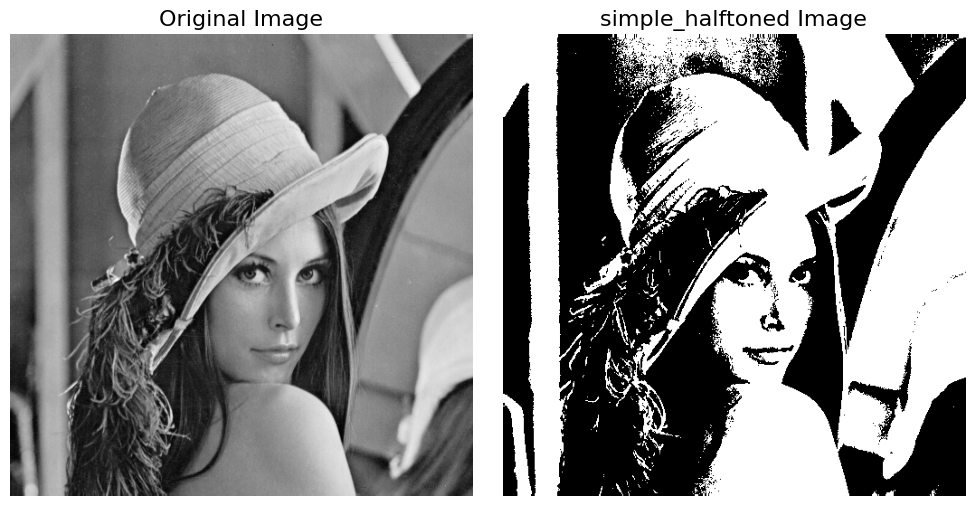

In [34]:
def apply_simple_halftoning(image_array, Threshold=128):
    output_array = np.zeros_like(image_array)
    for row in range(height):
        for column in range(width):
            pixel_value = image_array[row,column]
            if(pixel_value<Threshold):
                output_array[row,column] = 0
            else:
                output_array[row,column] = 255
    return output_array

show_results(output_array=apply_simple_halftoning(image_array), output_image_name="simple_halftoned")

Advanced Halftoning Algorithm:

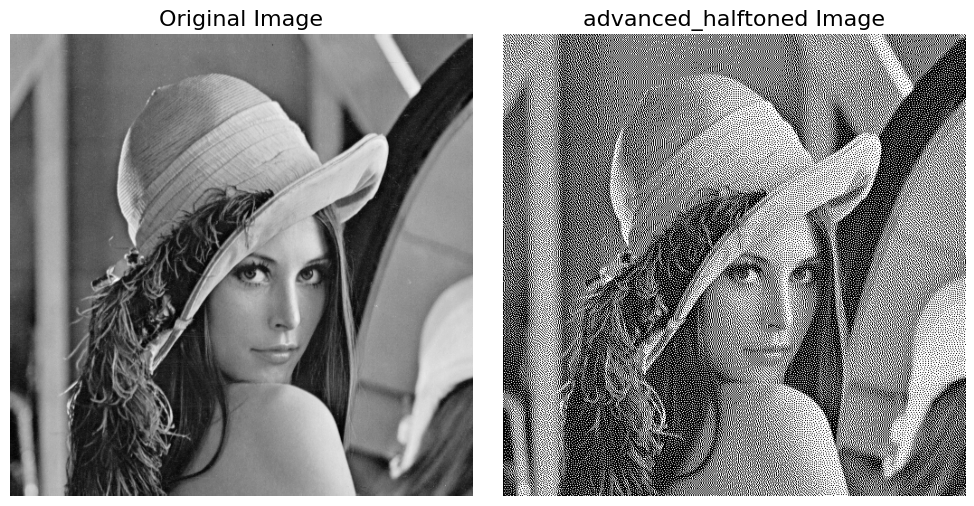

In [35]:
def apply_advanced_halftoning(image_array, Threshold=128):
    image_array = image_array.astype(float)
    for row in range(height):
        for column in range(width):
            pixel_value = image_array[row,column]
            if(pixel_value<Threshold):
                image_array[row,column] = 0
            else:
                image_array[row,column] = 255
            #propagate the error to its neighbors
            error = pixel_value - image_array[row,column]
            if column+1<width:
                image_array[row,column+1] += error*(7/16)
            if row+1<height and column+1<width:
                image_array[row+1,column+1] += error*(1/16)
            if row+1<height:
                image_array[row+1,column] += error*(5/16)
            if row+1<height and column-1>=0:
                image_array[row+1,column-1] += error*(3/16)
    return image_array

show_results(output_array=apply_advanced_halftoning(image_array), output_image_name="advanced_halftoned")